# 1. Introduction

This challenge comes from [#WOW2023 | Week 21 | Profit vs Target (with Tolerance)](https://workout-wednesday.com/2023w21tab/). The key points are highlighting some specific bar and allowing the user to select a *tolerance* interactively.

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = '../data/Superstore with Target Profit WOW2023 W21.xlsx'

In [3]:
data = pd.read_excel(file_path)

In [4]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Target Profit
0,1,CA-2020-152156,2022-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,50.280271
1,2,CA-2020-152156,2022-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,223.835267
2,3,CA-2020-138688,2022-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,6.028207


In [5]:
data_grouped = data[data['Order Date'].dt.year==2023].groupby(data['Order Date'].dt.month).sum(numeric_only=True)
data_grouped

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Target Profit
Order Date,,,,,,,
1,847373,9309959.0,43971.3740,597,25.00,7140.4391,6742.347947
2,593504,6793677.0,20301.1334,363,19.47,1613.8720,1431.248121
3,1293993,13934376.0,58872.3528,885,31.14,14751.8915,14653.733759
4,948011,10137966.0,36521.5361,733,39.47,933.2900,1519.050463
5,1346912,14187724.0,44261.1102,887,36.89,6342.5828,5745.763088
6,1171681,13582238.0,52981.7257,931,42.12,8223.3357,8330.637592
7,1183701,11905252.0,45264.4160,840,31.65,6952.6212,7617.256714
8,1141105,13521406.0,63120.8880,884,31.30,9040.9557,8804.249056
9,2358436,25163354.0,87866.6520,1660,67.65,10991.5556,10915.864868


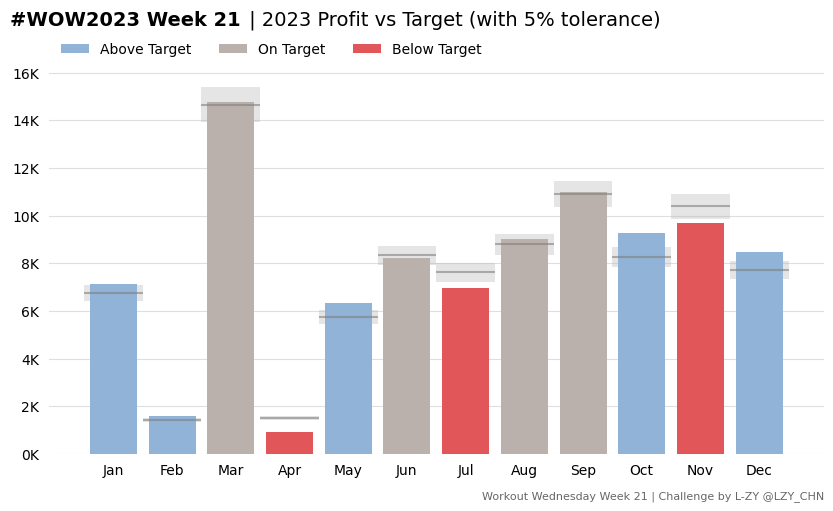

In [6]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcollections
import matplotlib.ticker as mticker

tolerence = 0.05
lower = data_grouped['Target Profit'] * (1 - tolerence)
upper = data_grouped['Target Profit'] * (1 + tolerence)
colors = ['#91B3D7' if p > u else ('#E15759' if p < l else '#BAB0AC')
          for p, l, u in zip(data_grouped['Profit'], lower, upper)]
labels = ['Above Target' if c  == '#91B3D7' else ('Below Target' if c == '#E15759' else 'On Target')
          for c in colors]
# Add '_' to the duplicate label to hide it
labels_unique = []
for label in labels:
    if label in labels_unique:
        labels_unique.append('_' + label)
    else:
        labels_unique.append(label)

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(data_grouped.index, data_grouped['Profit'], color=colors, label=labels_unique)
ax.legend(ncols=3, frameon=False, 
         loc='lower left', bbox_to_anchor=(0, 1))

# Add target profit lines
lines = [[(x-0.5,y),(x+0.5,y)] for x, y in zip(data_grouped.index, data_grouped['Target Profit'])]
line_artist = mcollections.LineCollection(lines, colors='gray', alpha=0.6)
ax.add_collection(line_artist)

# Add tolerence rectangle
ax.bar(data_grouped.index, upper-lower, bottom=lower, width=1, color='gray', alpha=0.2, zorder=0)

# Style the figure
ax.xaxis.set_ticks(data_grouped.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

ax.spines[:].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.yaxis.grid(True, alpha=0.4)
ax.yaxis.set_zorder(0) # To set the zorder of gridlines, we should set the zorder of the corresponding axis.

# Add Title
xy = (-0.05, 1.05)
ax.annotate('#WOW2023 Week 21', xy=xy, xytext=(0, 15), 
            xycoords='axes fraction', textcoords='offset points',
            ha='left', va='bottom', fontsize=14, fontweight='bold')
ax.annotate(f' | 2023 Profit vs Target (with {tolerence:.0%} tolerance)', xy=xy, xytext=(14*12, 15),
            xycoords='axes fraction', textcoords='offset points',
            ha='left', va='bottom', fontsize=14)

ax.annotate('Workout Wednesday Week 21 | Challenge by L-ZY @LZY_CHN', xy=(1, 0), xytext=(0, -26),
            xycoords='axes fraction', textcoords='offset points',
            ha='right', va='top', fontsize=8, alpha=0.6);

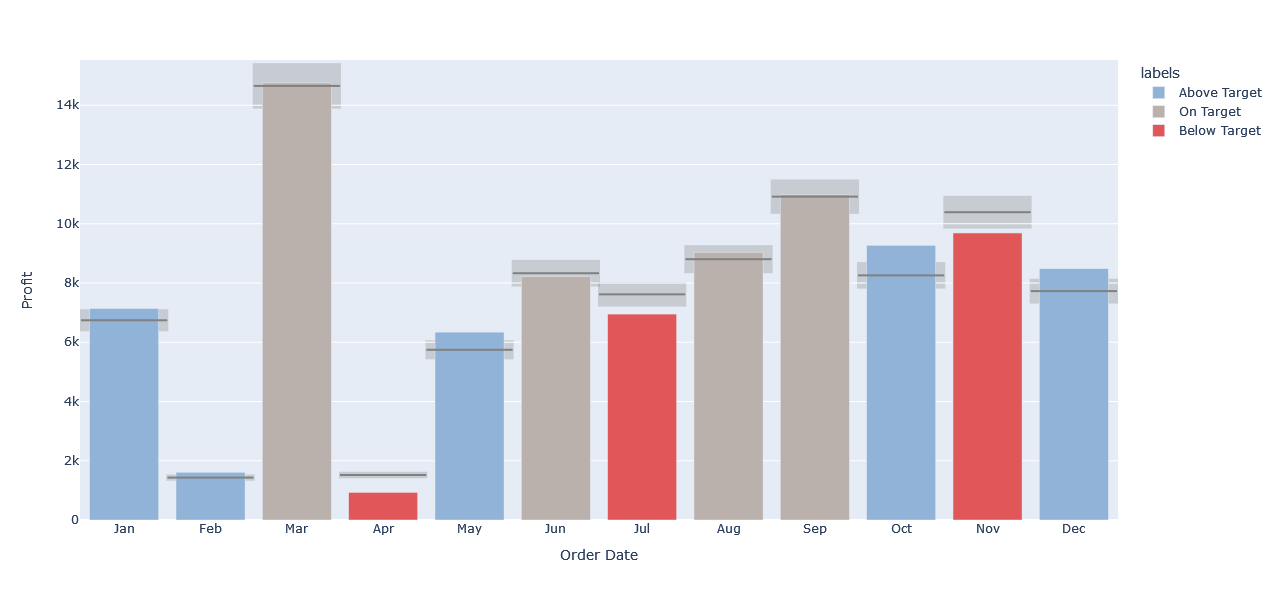

In [24]:
import plotly.express as px

tolerence = 0.05

data_px = data_grouped.reset_index()
data_px['labels'] = labels
data_px['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_px['profit diff'] = (data_px['Profit'] - data_px['Target Profit']) / data_px['Target Profit']

fig = px.bar(data_px, x='Order Date', y='Profit', color='labels',
             color_discrete_sequence=['#91B3D7', '#BAB0AC', '#E15759'],
            )
fig.update_traces(
    customdata=data_px.loc[:,['month', 'Profit', 'profit diff', 'Target Profit']],
    hovertemplate=('<b>%{customdata[0]} 2023</b><br>'
                   'Profit: <b>$%{customdata[1]:,.0f}</b><br>'
                   '%{customdata[2]:.0%} difference from Target ($%{customdata[3]:,.0f})<extra></extra>'),
    hoverlabel=dict(bgcolor='white'),
)

for m, t, l, u in zip(data_px['Order Date'], data_px['Target Profit'], lower, upper):
    fig.add_shape(
        type='line',
        x0=m-0.5, y0=t, x1=m+0.5, y1=t,
        line_color='gray'
    )
    fig.add_shape(
        type='rect',
        x0=m-0.5, y0=l, x1=m+0.5, y1=u,
        line_color='gray',
        fillcolor='gray',
        opacity=0.3,
        layer='below',
    )

fig.update_layout(
    height=600
)
fig.update_xaxes(
    tickvals=data_px['Order Date'],
    ticktext=data_px['month'],
)

fig.show()

In [17]:
data_px.loc[:,['month', 'Profit', 'profit diff', 'Target Profit']].values

array([['Jan', 7140.4391000000005, 0.05904340085556197,
        6742.347947432092],
       ['Feb', 1613.8719999999994, 0.12759763790213563,
        1431.2481205641436],
       ['Mar', 14751.8915, 0.006698479901463374, 14653.733758934382],
       ['Apr', 933.2899999999996, -0.38560961438405866,
        1519.0504634351555],
       ['May', 6342.582799999999, 0.10387127047805923, 5745.763088166235],
       ['Jun', 8223.3357, -0.012880393710832851, 8330.63759204784],
       ['Jul', 6952.6212, -0.0872539207411406, 7617.256713548918],
       ['Aug', 9040.9557, 0.02688550068649195, 8804.249055961891],
       ['Sep', 10991.5556, 0.006934011453682011, 10915.864867978591],
       ['Oct', 9275.2755, 0.12312115539783783, 8258.481692221765],
       ['Nov', 9690.1037, -0.06736260446479675, 10390.00124420192],
       ['Dec', 8483.3468, 0.09793597157762471, 7726.63162480256]],
      dtype=object)